In [161]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [162]:
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

# Chapter 2

## C1

In [163]:
retirement_data = pd.read_stata("401K.DTA")

In [164]:
retirement_data.shape

(1534, 8)

In [165]:
retirement_data.head()

,prate,mrate,totpart,totelg,age,totemp,sole,ltotemp
0,26.100000,0.21,1653.0,6322.0,8,8709.0,0,9.072112
1,100.000000,1.42,262.0,262.0,6,315.0,1,5.752573
2,97.599998,0.91,166.0,170.0,10,275.0,1,5.616771
3,100.000000,0.42,257.0,257.0,7,500.0,0,6.214608
4,82.500000,0.53,591.0,716.0,28,933.0,1,6.838405


In [166]:
prate = retirement_data.pop('prate')

### i

In [167]:
print("Average participation rate: %s" % prate.mean())
print("Average match rate: %s" % retirement_data['mrate'].mean())

Average participation rate: 87.3629
Average match rate: 0.731513


/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


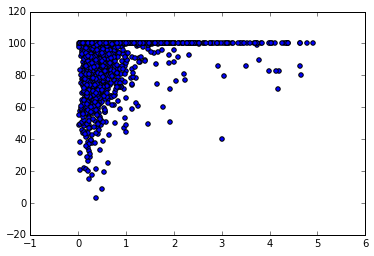

In [168]:
plt.scatter(retirement_data['mrate'], prate)

### ii

In [169]:
mrate = retirement_data['mrate']
mrate = sm.add_constant(mrate)
model = sm.OLS(prate, mrate)
results = model.fit()

In [170]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           1.10e-27
Time:                        23:30:26   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         83.0755      0.563    147.484      0.000        81.971    84.180
mrate          5.8611      0.527     11.121      0.000         4.827     6.895
==============================================================================
Omnibus:                      394.767   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.172
Skew:                          -1.444   Prob(JB):                    1.11e-189
Kurtosis:                       5.296   Cond. No.                         2.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### iii

The estimated intercept is 83.0755 and the coefficient for `mrate` is 5.8611. This can be interpreted as that if the matching rate were zero ~83% of eligible workers would be participating. The coefficient for `mrate` can be said to increase the `prate` by 5.86% for each additional dollar matched by the employer.

### iv

In [171]:
test = pd.Series(data=[3.5])
test = sm.add_constant(test)
new_prate = results.predict(test)

In [172]:
"Participation rate when mrate=3.5 is %s percent" % new_prate[0]

'Participation rate when mrate=3.5 is 103.589229584 percent'

This is not a realistic estimation because you can't have more employees participating in your 401k matching program than you actually employ. This unrealistic assumption is a result of the regression believeing the relationship between `prate` and `mrate` is linear at all values.

### v

Since the r-squared of the regression is ~ 0.075 this means that the model, and by extension `mrate` explain about 7.5% of the total variation in `prate`. I do not think this is a lot, there could be more explanatory factors that we should include such as debt, age, and number of dependents.

## C3

In [173]:
sleep_data = pd.read_stata("SLEEP75.DTA")

In [174]:
sleep_data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [175]:
sleep = sleep_data.pop('sleep')
work = sleep_data.pop('totwrk')

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


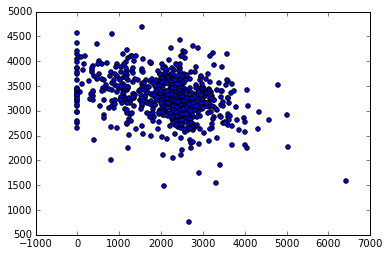

In [176]:
plt.scatter(work, sleep)

In [177]:
work = sm.add_constant(work)
model = sm.OLS(sleep, work)
results = model.fit()

### i

In [178]:
"sleep = %s %stotwrk , No. Observations: %s , R-squared: %s" % (results.params[0],
                                                                results.params[1], 
                                                                results.nobs,
                                                                results.rsquared)

'sleep = 3586.37695151 -0.150745824119totwrk , No. Observations: 706.0 , R-squared: 0.103287375729'

In this equation the intercept represents the amount of time sleeping per week an unemployed person would experience.

### ii

In [179]:
hours = 2
lost_sleep = np.abs(results.params[1] * (hours * 60))
"Estimated sleep loss with %s hours more work: %s" % (hours, lost_sleep)

'Estimated sleep loss with 2 hours more work: 18.0894988943'

I don't find this affect to be large, if I only had to give up 18 minutes of sleep for 2 extra hours of productivity I probably would (up to a limit).

# Chapter 3

## 3

### i
The sign of $\beta_1 totwrk$ is negative.

### ii
I think $\beta_2 educ$ will be positive, and $\beta_3 age$ will be negative.

### iii
They will lose 44.4 minutes of sleep if they work 5 additional hours. I don't think that is a large tradeoff.

### iv
This surprises me, the negative sign indicates that the more education someone has the less sleep they are likely to enjoy. Moreover, the magnitude of the coefficient indicates that a change in education level has the most drastic affect on sleep duration.

### v
No, I think there are other factors such as number of children, and recreational activites that are likely to affect, they may be correlated with total amount of time spent working.

## 6

Since $\theta_1 = \beta_1 + \beta_2$, and the definition of an unbiased estimator is $E[\hat\beta_n] = \beta_n$ we can, given the Law of Iterated Expectations, say that $E[\hat\beta_1] + E[\hat\beta_2] = E[\hat\theta_1] = \theta_1$

## 7

Heteroskedasticty violates MLR.5, therefore our **OLS** estimator will be biased.

## C2

In [180]:
house_pricing_data = pd.read_stata("hprice1.dta")

In [181]:
house_pricing_data.head()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.100006,4,6126.0,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.500000,3,9903.0,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.699997,3,5200.0,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.800003,3,4600.0,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.100006,4,6095.0,2514,1,5.921578,5.765504,8.715224,7.829630


In [182]:
price = house_pricing_data.pop('price')
factors = house_pricing_data[['sqrft', 'bdrms']]

In [183]:
factors = sm.add_constant(factors)
model = sm.OLS(price, factors)
results = model.fit()

In [184]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     72.96
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.57e-19
Time:                        23:30:27   Log-Likelihood:                -488.00
No. Observations:                  88   AIC:                             982.0
Df Residuals:                      85   BIC:                             989.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -19.3150     31.047     -0.622      0.536       -81.044    42.414
sqrft          0.1284      0.014      9.291      0.000         0.101     0.156
bdrms         15.1982      9.484      1.603      0.113        -3.658    34.054
==============================================================================
Omnibus:                       25.221   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.973
Skew:                           1.122   Prob(JB):                     1.72e-10
Kurtosis:                       5.689   Cond. No.                     9.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### i

In [185]:
"price = %s + %ssqrft + %sbdrms" % tuple(results.params)

'price = -19.3149957652 + 0.128436210368sqrft + 15.1981909678bdrms'

### ii

In [186]:
additional_bedrooms = 1
price_increase_bedroom = results.params[2] * additional_bedrooms
"There is  $%s increase in price for 1 additional bedroom" % (price_increase_bedroom * 1000)

'There is  $15198.1909678 increase in price for 1 additional bedroom'

### iii

In [187]:
additional_square_footage = 140
price_increase_square_footage = results.params[1] * additional_square_footage
complete_price_increase = price_increase_bedroom + price_increase_square_footage
"The total price increase of an additonal bedroom of %s square feet is $%s" % (additional_square_footage, 1000 * complete_price_increase)

'The total price increase of an additonal bedroom of 140 square feet is $33179.2604194'

This indicates that the increase in value attributed to the increase in square footage is directly related to the increase in value due to the additional bedroom. Which makes sense as those are related variables.

### iv

In [188]:
print("Price change explained by square footage: %s percent." % ((price_increase_square_footage / complete_price_increase) * 100))

Price change explained by square footage: 54.1937018013 percent.


In [189]:
print("Price change explained by bedrooms: %s percent." % ((price_increase_bedroom / complete_price_increase) * 100))

Price change explained by bedrooms: 45.8062981987 percent.


### v

In [190]:
first_house = pd.DataFrame(columns = ['sqrft', 'bdrms'], data=[[2438, 4]])
first_house = sm.add_constant(first_house)
first_house_estimate = results.predict(first_house)

In [191]:
"First house predicted price: $%s" % (first_house_estimate[0] * 1000)

'First house predicted price: $354605.248984'

### vi

In [192]:
"Residual: $%s" % (results.resid[0] * 1000)

'Residual: $-54605.248984'

Because the residual is negative this suggests that the buyer underpaid for the home.

## C3

In [193]:
ceo_salary_data = pd.read_stata("CEOSAL2.DTA")

In [194]:
ceo_salary_data.head()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208


In [195]:
salary = ceo_salary_data.pop('lsalary')
log_factors = ceo_salary_data[['lsales', 'lmktval']]

### i

In [196]:
log_factors = sm.add_constant(log_factors)
model = sm.OLS(log_salary, log_factors)
results = model.fit()

In [197]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     37.13
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           3.73e-14
Time:                        23:30:28   Log-Likelihood:                -130.56
No. Observations:                 177   AIC:                             267.1
Df Residuals:                     174   BIC:                             276.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.6209      0.254     18.163      0.000         4.119     5.123
lsales         0.1621      0.040      4.087      0.000         0.084     0.240
lmktval        0.1067      0.050      2.129      0.035         0.008     0.206
==============================================================================
Omnibus:                       17.241   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.383
Skew:                          -0.038   Prob(JB):                     1.72e-14
Kurtosis:                       5.931   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
"lsalary = %s + %slsales + %slmktval" % tuple(results.params)

'lsalary = 4.62092 + 0.162128lsales + 0.106708lmktval'

### ii

Profit cannot be added to this constant elasticity model because it could potentially take on negative values, which would probably be very significant to the CEO's salary. The R-squared of this model is quite high compared to other models we have studied ~.30, however most of the variation to me means more than half so these factors do not yet explain most of the variation.

### iii

In [199]:
ceo_tenure = ceo_salary_data['ceoten']
factors = pd.concat([log_factors, ceo_tenure], 1)

In [200]:
model = sm.OLS(log_salary, factors)
results = model.fit()

In [201]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     26.91
Date:                Sun, 06 Nov 2016   Prob (F-statistic):           2.47e-14
Time:                        23:30:28   Log-Likelihood:                -128.12
No. Observations:                 177   AIC:                             264.2
Df Residuals:                     173   BIC:                             276.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.5038      0.257     17.509      0.000         3.996     5.012
lsales         0.1629      0.039      4.150      0.000         0.085     0.240
lmktval        0.1092      0.050      2.203      0.029         0.011     0.207
ceoten         0.0117      0.005      2.198      0.029         0.001     0.022
==============================================================================
Omnibus:                       25.596   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.522
Skew:                          -0.291   Prob(JB):                     1.50e-27
Kurtosis:                       7.051   Cond. No.                         95.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a 1.17% change in CEO salary for every additional year of tenure.

### iv

In [202]:
lmktval = ceo_salary_data['lmktval']
profits = ceo_salary_data['profits']
np.corrcoef(lmktval, profits)

array([[ 1.        ,  0.77689759],
       [ 0.77689759,  1.        ]])

There is a 0.78 correlation coefficient between `log(mktval)` and `profits`. Since these two factors are correlated it increases the variances of the estimators.

## C5

In [203]:
wage_data = pd.read_stata("WAGE1.DTA")
wage_data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [204]:
wage = wage_data['wage']
education = wage_data['educ']
factors = wage_data[['exper', 'tenure']]

In [205]:
factors = sm.add_constant(factors)
model = sm.OLS(education, factors)
results_1 = model.fit()

In [206]:
first_resids = pd.Series(data=results_1.resid)

In [207]:
first_resids = sm.add_constant(first_resids)
model = sm.OLS(np.log10(wage), first_resids)
results_2 = model.fit()
first_resids_coefficient = results_2.params[1]

In [208]:
new_factors = wage_data[['exper', 'tenure', 'educ']]
new_factors = sm.add_constant(new_factors)
model = sm.OLS(np.log10(wage), new_factors)
results_3 = model.fit()
education_coefficient = results_3.params[3]

In [209]:
"The coefficients are equal: %s == %s" % (first_resids_coefficient, education_coefficient)

'The coefficients are equal: 0.0399676816114 == 0.0399676816114'